#### <h1><center>CMSC 478: Introduction to Machine Learning</center></h1>

<center><img src="img/title.jpg" align="center"/></center>


<h3 style="color:blue;"><center>Instructor: Fereydoon Vafaei</center></h3>


<h5 style="color:purple;"><center>Dimensionality Reduction and PCA</center></h5>

<center><img src="img/UMBC_logo.png" align="center"/></center>

<h1><center>Agenda</center></h1>


- Curse of Dimensionality
- <b> Dimensionality Reduction</b>
    - Manifold Learning
    - Data Projection
        - Reducing Reconstruction Error
        - Maximizing Variance
- Principal Components Analysis (PCA)
    - Singular Value Decomposition (SVD)
- Explained Variance Ratio
- PCA for Compression
- Kernel PCA

<h1><center>Curse of Dimensionality</center></h1>

- We are so used to living in three dimensions that our intuition fails us when we try to imagine a high-dimensional space.

- Even a basic 4D hypercube is incredibly hard to picture in our minds.

- Watch a rotating [tesseract](https://en.wikipedia.org/wiki/Tesseract) projected into 3D space at https://homl.info/30.

<center><img src="img/fig-8-1.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>Curse of Dimensionality - High-Dimensional Space</center></h1>

- It turns out that many things behave very differently in **high-dimensional space**.


- For example, if you pick a random point in a unit square (a 1 × 1 square), it will have only about a 0.4% chance of being located less than 0.001 from a border (in other words, it is very unlikely that a random point will be “extreme” along any dimension).


- But in a 10,000-dimensional unit hypercube, this probability is greater than 99.999999%.


- Most points in a high-dimensional hypercube are very close to the border.

<h1><center>Curse of Dimensionality - Sparsity</center></h1>

- Here is a more troublesome difference: if you pick two points randomly in a unit square, the distance between these two points will be, on average, roughly 0.52. If you pick two random points in a unit 3D cube, the average distance will be roughly 0.66.

- But what about two points picked randomly in a 1,000,000-dimensional hypercube? The average distance will be about 408.25 roughly $\sqrt{1, 000, 000/6}$

- This is counterintuitive: how can two points be so far apart when they both lie within the same unit hypercube? Well, there’s just plenty of space in high dimensions. As a result, high-dimensional datasets are at risk of being very **sparse**: most training instances are likely to be far away from each other.

- This also means that a new instance will likely be far away from any training instance, making predictions much less reliable than in lower dimensions, since they will be based on much larger extrapolations.

- In short, the more dimensions the training set has, the greater the risk of **overfitting** it.

<h1><center>Curse of Dimensionality - Increasing the Size of Training Set</center></h1>

- In theory, one solution to the curse of dimensionality could be to increase the size of the training set to reach a sufficient density of training instances.


- Unfortunately, in practice, the number of training instances required to reach a given density grows exponentially with the number of dimensions. With just 100 features (significantly fewer than in the MNIST problem), you would need more training instances than atoms in the observable universe in order for training instances to be within 0.1 of each other on average, assuming they were spread out uniformly across all dimensions.

<h1><center>Curse of Dimensionality - Computational Costs</center></h1>

<center><img src="img/curse.png" align="center"/></center>

<font size='1'>Image from Ref[2]</font>

<h1><center>Curse of Dimensionality - Computational Costs</center></h1>

<center><img src="img/curse-2.png" align="center"/></center>

<font size='1'>Image from Ref[2]</font>

<h1><center>High-Dimensional Data</center></h1>

### High Dimensions - Lots of features


<center><img src="img/meg.png" align="center"/></center>

<font size='1'>Image from Ref[3]</font>

<h1><center>High-Dimensional Data - fMRI</center></h1>

<center><img src="img/fmri_scanner.jpeg" align="center"/></center>

<center><img src="img/fmri_scan.jpg" align="center"/></center>

<font size='1'>Images from Ref[6]</font>

<h1><center>Dimensionality Reduction</center></h1>

- In many practical applications of ML, it is desirable to reduce the **dimensionality** of the data:
    - Data visualization
    - Data exploration: for investigating the **effective** dimensionality of the data
    - More efficient use of resources (e.g., time, memory, communication)
    - Overfitting: fewer dimensions -> better generalization
    - Noise removal (improving data quality)
    - Preprocessing: further processing by ML models (e.g. image classifiers)

<h1><center>Main Approaches for Dimensionality Reduction</center></h1>

- There are two main approaches to reducing dimensionality:
    - **Projection**
    - **Manifold Learning**

<h1><center>Projection</center></h1>

- In most real-world problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated. As a result, all training instances lie within (or close to) a much lower-dimensional subspace of the high-dimensional space.

- In Figure 8-2 you can see a 3D dataset represented by circles.

- Notice that all training instances lie close to a plane: this is a lower-dimensional (2D) subspace of the high-dimensional (3D) space.

<center><img src="img/fig-8-2.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>Projection</center></h1>

- If we project every training instance perpendicularly onto this subspace (as represented by the short lines connecting the instances to the plane), we get the new 2D dataset shown in Figure 8-3.

- We have just reduced the dataset’s dimensionality from 3D to 2D. Note that the axes correspond to new features $z_1$ and $z_2$ (the coordinates of the projections on the plane).

<center><img src="img/fig-8-3.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>Swiss Roll - 2D Manifold</center></h1>

- Projection is not always the best approach to dimensionality reduction.

- In many cases the subspace may twist and turn, such as in the famous **Swiss roll** toy dataset represented in Figure 8-4.

- The Swiss roll is an example of a **2D manifold**. Put simply, a **2D manifold** is a 2D shape that can be bent and twisted in a higher-dimensional space.

- More generally, a d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally resembles a d-dimensional hyperplane.

- In the case of the Swiss roll, d = 2 and n = 3: it locally resembles a 2D plane, but it is rolled in the third dimension.

<center><img src="img/fig-8-4.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>Unrolling Swiss Roll Manifold</center></h1>

- Simply projecting onto a plane (e.g., by dropping $x_3$) would squash different layers of the Swiss roll together, as shown on the left side of Figure 8-5.

- What you really want is to unroll the Swiss roll to obtain the 2D dataset on the right side of Figure 8-5.

<center><img src="img/fig-8-5.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>Manifold Learning</center></h1>

- Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is called **Manifold Learning**.


- It relies on the manifold assumption, also called the **manifold hypothesis**, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold.


- This assumption is very often empirically observed.

<h1><center>Manifold Learning Assumptions</center></h1>

- The **manifold assumption** is often accompanied by another implicit assumption: that the task at hand (e.g., classification or regression) will be simpler if expressed in the lower-dimensional space of the manifold.

- For example, in the top row of Figure 8-6 the Swiss roll is split into two classes: in the 3D space (on the left), the decision boundary would be fairly complex, but in the 2D unrolled manifold space (on the right), the decision boundary is a straight line.

- However, this implicit assumption does not always hold. For example, in the bottom row of Figure 8-6, the decision boundary is located at $x_1 = 5$. This decision boundary looks very simple in the original 3D space (a vertical plane), but it looks more complex in the unrolled manifold (a collection of four independent line segments).

- In short, reducing the dimensionality of your training set before training a model will usually speed up training, but it may not always lead to a better or simpler solution; it all depends on the dataset.

<center><img src="img/fig-8-6.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>Data Projection</center></h1>

<center><img src="img/projection-01.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>Dimensionality Reduction - Reconstruction</center></h1>

<center><img src="img/dimensionality-reduction.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>Principal Component Analysis (PCA) - Geometric Perspective</center></h1>

<center><img src="img/pca-def.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>PCA - Problem Definition</center></h1>

<center><img src="img/pca-problem.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>First Principal Component</center></h1>

<center><img src="img/pca-first.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>Equivalence of Minimizing Reconstruction Error and Maximizing the Variance</center></h1>

<center><img src="img/pca-eq.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>Reconstruction and Variance</center></h1>

<center><img src="img/max-variance.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>Centering</center></h1>

<center><img src="img/centering.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>Centered Data</center></h1>

<center><img src="img/projection-02.png" align="center"/></center>

<font size='1'>Image from Ref[4]</font>

<h1><center>Centered Data Projection</center></h1>

<center><img src="img/projection-3.png" align="center"/></center>

<font size='1'>Image from Ref[4]</font>

<h1><center>Finding Directions for Data Projection</center></h1>

- There are infinite number of choices (directions) for projecting the data; thus we need a criteria:

    - Finding a direction with <font color="blue"><b>Minimum Reconstruction Error</b></font> (minimum information loss)

    - Equivalently, finding a direction with <font color="blue"><b>Maximum Variance</b></font>

<h1><center>Data Projection - Minimum Reconstruction Error</center></h1>

<center><img src="img/reconstruction.png" align="center"/></center>

<font size='1'>Image from Ref[2]</font>

<h1><center>Data Projection - Maximizing the Variance</center></h1>

### Consider the two projections below. Which one maximizes the variance?

<center><img src="img/variance-1.png" align="center"/></center>

<font size='1'>Image from Ref[3]</font>

<h1><center>Preserving the Variance</center></h1>

- Before you can project the training set onto a lower-dimensional hyperplane, you first need to choose the right hyperplane. For example, a simple 2D dataset is represented on the left in Figure 8-7, along with three different axes (i.e., 1D hyperplanes).

- On the right is the result of the projection of the dataset onto each of these axes. As you can see, the projection onto the solid line preserves the maximum variance, while the projection onto the dotted line preserves very little variance and the projection onto the dashed line preserves an intermediate amount of variance.

- It seems reasonable to select the axis that **preserves the maximum amount of variance**, as it will most likely lose less information than the other projections.

- Another way to justify this choice is that it is the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis. This is the rather simple idea behind PCA.

<center><img src="img/fig-8-7.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>PCA 1st Axis</center></h1>

<center><img src="img/variance-2.png" align="center"/></center>

<font size='1'>Image from Ref[3]</font>

<h1><center>PCA 2nd Axis</center></h1>

<center><img src="img/variance-3.png" align="center"/></center>

<font size='1'>Image from Ref[3]</font>

<h1><center>Eigenproblem</center></h1>

<center><img src="img/eigen-1.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>Eigenproblem Cont.</center></h1>

<center><img src="img/eigen-2.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>Eigenproblem Cont.</center></h1>

<center><img src="img/eigen-3.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>Eigenproblem Cont.</center></h1>

<center><img src="img/eigen-4.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>Principal Components</center></h1>

- How can you find the **principal components** of a training set?

- Luckily, there is a standard matrix factorization technique called **Singular Value Decomposition (SVD)** that can decompose the training set matrix $\mathbf{X}$ into the matrix multiplication of three matrices $\mathbf{U Σ} \mathbf{V}^T$ where $\mathbf{V}$ contains the unit vectors that define all the principal components that we are looking for, as shown in Equation 8-1.

**Equation 8-1: Principal components matrix**

$
\mathbf{V} =
\begin{pmatrix}
  \mid & \mid & & \mid \\
  \mathbf{c_1} & \mathbf{c_2} & \cdots & \mathbf{c_n} \\
  \mid & \mid & & \mid
\end{pmatrix}
$

<h1><center>Singular Value Decomposition (SVD)</center></h1>

<center><img src="img/svd-1.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>SVD Cont.</center></h1>

<center><img src="img/svd-2.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>SVD Cont.</center></h1>

<center><img src="img/svd-3.png" align="center"/></center>

<font size='1'>Slide from Ref[5]</font>

<h1><center>Direction of Principal Components</center></h1>

- For each principal component, PCA finds a zero-centered unit vector pointing in the direction of the PC.

- Since two opposing unit vectors lie on the same axis, the direction of the unit vectors returned by PCA is not stable: if you perturb the training set slightly and run PCA again, the unit vectors may point in the opposite direction as the original vectors. However, they will generally still lie on the same axes.

- In some cases, a pair of unit vectors may even rotate or swap (if the variances along these two axes are close), but the plane they define will generally remain the same.

<center><img src="img/pca-directions.png" align="center"/></center>

<font size='1'>Image from Ref[7]</font>

<h1><center>Projecting Down to d Dimensions</center></h1>

- Once you have identified all the principal components, you can reduce the dimensionality of the dataset down to $d$ dimensions by projecting it onto the hyperplane defined by the first $d$ principal components.

- Selecting this hyperplane ensures that the projection will preserve as much variance as possible.

- To project the training set onto the hyperplane and obtain a reduced dataset $\mathbf{X}_{d\text{-proj}}$ of dimensionality $d$, compute the matrix multiplication of the training set matrix $\mathbf{X}$ by the matrix $\mathbf{W}_d$ , defined as the matrix containing the first $d$ columns of $\mathbf{V}$, as shown in Equation 8-2.

**Equation 8-2: Projecting the training set down to _d_ dimensions**

$
\mathbf{X}_{d\text{-proj}} = \mathbf{X} \mathbf{W}_d
$

<h1><center>Using Scikit-Learn</center></h1>

- Scikit-Learn’s PCA class uses SVD decomposition to implement PCA.

- The following code applies PCA to reduce the dimensionality of the dataset down to two dimensions usinf [`.fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform) method. Note that it automatically takes care of centering the data:

In [1]:
import numpy as np
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

- After fitting the PCA transformer to the dataset, its `components_` attribute holds the transpose of $\mathbf{W}_d$ e.g., the unit vector that defines the first principal component is equal to `pca.components_.T[:, 0]`

<h1><center>Explained Variance Ratio</center></h1>

- Another useful information is the explained variance ratio of each principal component, available via the `explained_variance_ratio_` variable.

- The ratio indicates the proportion of the dataset’s variance that lies along each principal component.

In [3]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

- This output tells you that 84.2% of the dataset’s variance lies along the first PC, and 14.6% lies along the second PC. This leaves less than 1.2% for the third PC, so it is reasonable to assume that the third PC probably carries little information.

<h1><center>Choosing the Right Number of Dimensions</center></h1>

- Instead of arbitrarily choosing the number of dimensions to reduce down to, it is simpler to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%).

- Unless, of course, you are reducing dimensionality for data visualization — in that case you will want to reduce the dimensionality down to 2 or 3.

- The following code performs PCA **without** dimensionality reduction using [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit) method, then computes the minimum number of dimensions required to preserve 95% of the training set’s variance:

In [5]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 # because the index of dimensions starts from 0

- You could then set `n_components=d` and run PCA again. But there is a much better option: instead of specifying the number of principal components you want to preserve, you can set `n_components` to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve:

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform()

<h1><center>Explained Variance Ratio</center></h1>

- Yet another option is to plot the explained variance as a function of the number of dimensions (simply plot cumsum ; see Figure 8-8).

- There will usually be an elbow in the curve, where the explained variance stops growing fast. In this case, you can see that reducing the dimensionality down to about 100 dimensions wouldn’t lose too much explained variance.

<center><img src="img/fig-8-8.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Text(0, 0.5, 'Explained Variance Ratio')

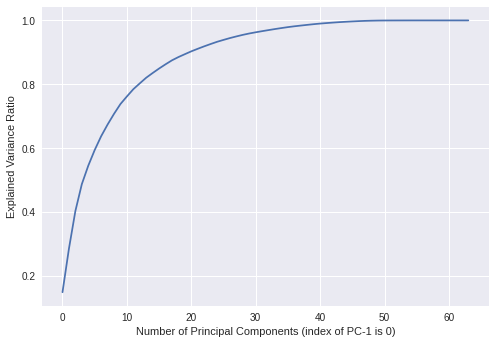

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

pca = PCA().fit(digits.data)
plt.style.use('seaborn')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components (index of PC-1 is 0)')
plt.ylabel('Explained Variance Ratio')

In [11]:
# to preserve 90% of variance, you need at least 21 dimensions
np.cumsum(pca.explained_variance_ratio_)[20]

0.9031985012037214

In [17]:
# to preserve 96.6% of variance, you need at least 32 dimensions
np.cumsum(pca.explained_variance_ratio_)[31]

0.9663542069634705

In [19]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.966) + 1 # because the index of dimensions/PCs starts from 0
d

32

<h1><center>PCA for Compression - Reconstruction Error</center></h1>

- After dimensionality reduction, the training set takes up much less space. As an example, try applying PCA to the MNIST dataset while preserving 95% of its variance. You should find that each instance will have just over 150 features, instead of the original 784 features.

- So, while most of the variance is preserved, the dataset is now less than 20% of its original size! This is a reasonable compression ratio, and you can see how this size reduction can speed up a classification algorithm (such as an SVM classifier) tremendously.

- It is also possible to decompress the reduced dataset back to 784 dimensions by applying the inverse transformation of the PCA projection. This won’t give you back the original data, since the projection lost a bit of information (within the 5% variance that was dropped), but it will likely be close to the original data.

- The mean squared distance between the original data and the reconstructed data (compressed and then decompressed) is called the **reconstruction error**.

<h1><center>Compression of MNIST</center></h1>

- Figure 8-9 shows a few digits from the original training set (on the left), and the corresponding digits after compression and decompression.
- You can see that there is a slight image quality loss, but the digits are still mostly intact.

<center><img src="img/fig-8-9.png" align="center"/></center>

<font size='1'>Slide from Ref[1]</font>

<h1><center>Randomized PCA</center></h1>

- If you set the `svd_solver` hyperparameter to `"randomized"` , Scikit-Learn uses a stochastic algorithm called **Randomized PCA** that quickly finds an approximation of the first $d$ principal components.

- Its computational complexity is $O(m × d^2) + O(d^3)$, instead of $O(m × n^2) + O(n^3)$ for the full SVD approach, so it is dramatically faster than full SVD when $d$ is much smaller than $n$:

In [5]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

- By default, `svd_solver` is actually set to `"auto"` : Scikit-Learn automatically uses the randomized PCA algorithm if $m$ or $n$ is greater than 500 and $d$ is less than 80% of $m$ or $n$, or else it uses the full SVD approach.

- If you want to force Scikit-Learn to use full SVD, you can set the `svd_solver` hyperparameter to `"full"`.

<h1><center>Incremental PCA</center></h1>

- One problem with the preceding implementations of PCA is that they require the whole training set to fit in memory in order for the algorithm to run.


- Fortunately, **Incremental PCA (IPCA)** algorithms have been developed. They allow you to split the training set into mini-batches and feed an **IPCA** algorithm one mini-batch at a time.


- This is useful for large training sets and for applying PCA online (i.e., on the fly, as new instances arrive).

<h1><center>Kernel PCA</center></h1>

- With PCA, the implicit assumption is that data lies on a linear subspace. There are situations where this assumption might be violated.

- It turns out that the same kernel trick used for SVM can be applied to PCA, making it possible to perform complex nonlinear projections for dimensionality reduction. This is called **Kernel PCA (kPCA)**.

- **kPCA** is often good at preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a twisted manifold.

- **kPCA** makes it possible to perform complex nonlinear projections for dimensionality reduction.

<h1><center>kPCA</center></h1>

- The following code uses Scikit-Learn’s KernelPCA class to perform kPCA with an RBF kernel:

In [ ]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

- Figure 8-10 shows the Swiss roll, reduced to two dimensions using a linear kernel (equivalent to simply using the PCA class), an RBF kernel, and a sigmoid kernel.

<center><img src="img/fig-8-10.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>Selecting a Kernel and Tuning Hyperparameters</center></h1>

- As kPCA is an unsupervised learning algorithm, there is no obvious performance measure to help you select the best kernel and hyperparameter values.

- That said, dimensionality reduction is often a preparation step for a supervised learning task (e.g., classification), so you can use grid search to select the kernel and hyperparameters that lead to the best performance on that task.

- The following code creates a two-step pipeline, first reducing dimensionality to two dimensions using kPCA, then applying Logistic Regression for classification. Then it uses `GridSearchCV` to find the best kernel and gamma value for kPCA in order to get the best classification accuracy at the end of the pipeline:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
("kpca", KernelPCA(n_components=2)),
("log_reg", LogisticRegression())
])
param_grid = [{
"kpca__gamma": np.linspace(0.03, 0.05, 10),
"kpca__kernel": ["rbf", "sigmoid"]
}]
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

- The best kernel and hyperparameters are then available through the `best_params_` variable.

<h1><center>LLE</center></h1>

- **Locally Linear Embedding (LLE)** is another powerful nonlinear dimensionality reduction (**NLDR**) technique.

- It is a Manifold Learning technique that does not rely on projections, like the previous algorithms do.

- In a nutshell, **LLE** works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking for a low-dimensional representation of the training set where these local relationships are best preserved.

- This approach makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise.

<center><img src="img/fig-8-12.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>Other Dimensionality Reduction Techniques</center></h1>

- There are many other dimensionality reduction techniques, several of which are available in Scikit-Learn. Here are some of the most popular ones: 
    - Random Projections
    - Multidimensional Scaling (MDS)
    - Isomap
    - t-Distributed Stochastic Neighbor Embedding (t-SNE)
    - Linear Discriminant Analysis (LDA)

<center><img src="img/fig-8-13.png" align="center"/></center>

<font size='1'>Image from Ref[1]</font>

<h1><center>Next Topic: Unsupervised Learning & Clustering</center></h1>

<h1><center>References</center></h1>

[1] Hands-On ML Textbook Edition-2 2019

[2] PCA - [Slides from EPFL](http://lasa.epfl.ch/teaching/lectures/ML_Msc/Slides/PCA.pdf)

[3] PCA - [Matt Gormley's Slides CMU](https://www.cs.cmu.edu/~mgormley/courses/10701-f16/slides/lecture14-pca.pdf) (some originally from Andrew Ng's Slides, Poczos' Slides and Nina Balcan's Slides)

[4] PCA - [Benrstein's Slides NYU](https://davidrosenberg.github.io/mlcourse/Archive/2017/Lectures/13-PCA-Slides.pdf)

[5] PCA - [Rosasco's Slides MIT](http://lcsl.mit.edu/courses/mlcc/mlcc2015/slides/MLCC_05_PCA.pdf)

[6] Introduction to fMRI - [University of Oxford](https://www.ndcn.ox.ac.uk/divisions/fmrib/what-is-fmri/introduction-to-fmri)

[7] [PCA Explained Simply](https://blog.bioturing.com/2018/06/14/principal-component-analysis-explained-simply/)